In [1]:
import pandas as pd
df=pd.read_excel('covid/COVID-19.xlsx')

df = df.filter(items=['month', 'geoId','cases','deaths'])
df=df.rename(columns={"geoId":"code"})
df=df.loc[df.month <=8]
df=df.loc[df['code'].isin(['FR','IT','ES'])]
df.head()


,month,code,cases,deaths
12498,8,FR,4586,23
12499,8,FR,4771,12
12500,8,FR,3776,17
12501,8,FR,2238,22
12502,8,FR,493,19


In [2]:
d = {'FR': 0, 'IT': 1, 'ES': 2}
df['code'] = df['code'].map(d)
df.head()

,month,code,cases,deaths
12498,8,0,4586,23
12499,8,0,4771,12
12500,8,0,3776,17
12501,8,0,2238,22
12502,8,0,493,19


In [3]:
features = list(df.columns[:3])
features

['month', 'code', 'cases']

In [11]:
from sklearn import tree
y = df['deaths']
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

NameError: name 'df' is not defined

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(X, y)


### Decision tree on iris

In [87]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from numpy import random, float
import numpy as np
%matplotlib inline


iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features_std, iris.target, test_size=.2, random_state=33)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0) # Train model
model = decisiontree.fit(xtrain, ytrain)

In [89]:
y_pred=model.predict(xtest)
from sklearn import metrics
print(metrics.accuracy_score(ytest, y_pred))

0.8666666666666667


#### f1-score, recall, precision

In [90]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score
y_train_pred = cross_val_predict(model, xtrain, ytrain, cv=3)
f1_score(ytrain, y_train_pred, average="macro")

0.9399240798811684

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain, y_train_pred)

array([[42,  0],
       [37, 41]])

In [98]:
## more detail on Aurélien Géron
# ytrain=np.where(ytrain==2, 1, ytrain) 
# y_train_pred=np.where(y_train_pred==2, 0, y_train_pred) 

# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt
# fpr, tpr, thresholds = roc_curve(ytrain, y_train_pred)

# def plot_roc_curve(fpr, tpr, label=None): 
#     plt.plot(fpr, tpr, linewidth=2, label=label) 
#     plt.plot([0, 1], [0, 1], 'k--') 
#     plt.axis([0, 1, 0, 1])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
    
# plot_roc_curve(fpr, tpr)
# plt.show()

### tree

In [15]:
from IPython.display import Image
import pydotplus

In [16]:
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                    out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names)


In [17]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)


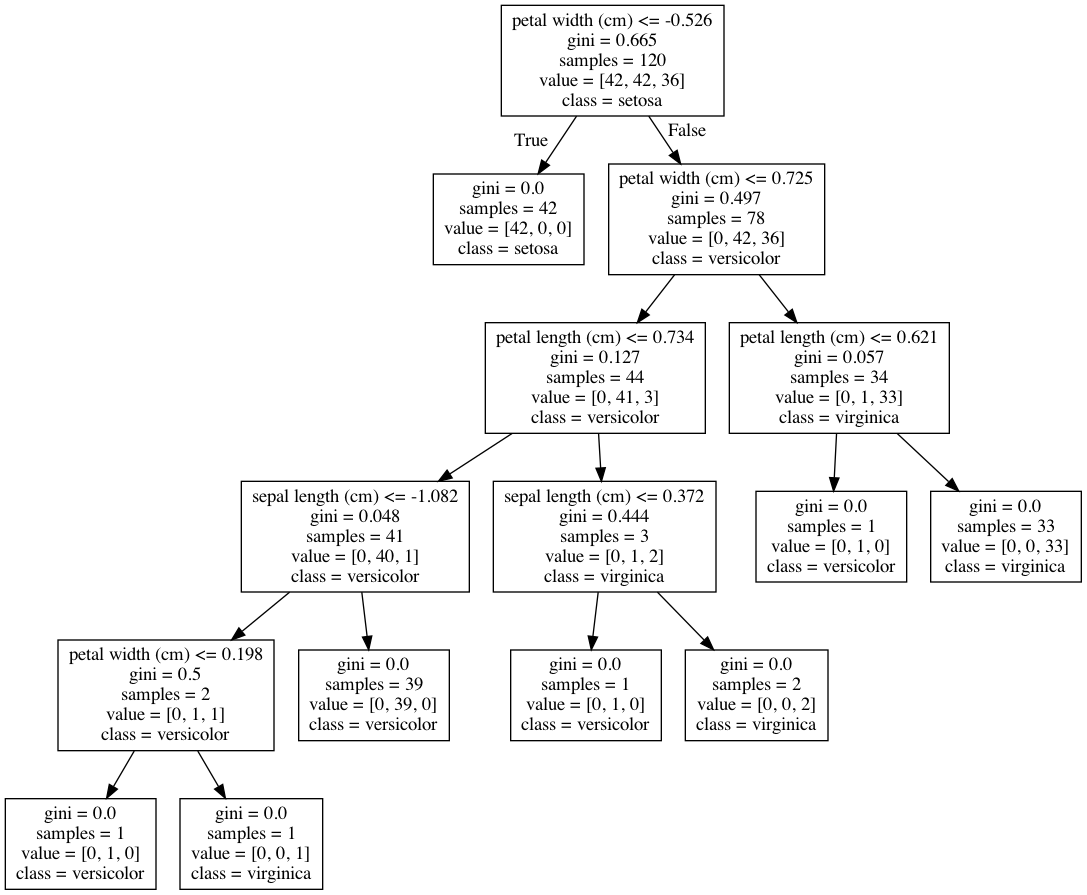

In [23]:
# Show graph
Image(graph.create_png())

In [22]:
graph.write_png("iris.png")

True

In [20]:
Image(graph)

FileNotFoundError: No such file or directory: '<pydotplus.graphviz.Dot object at 0x12320a220>'

FileNotFoundError: No such file or directory: '<pydotplus.graphviz.Dot object at 0x12320a220>'

<IPython.core.display.Image object>